In [1]:
import cv2
import numpy as np
from PIL import Image
from math import ceil

In [2]:
# Adapted from: https://www.geeksforgeeks.org/python-pil-image-crop-method/

# Importing Image class from PIL module
# from PIL import Image

filepath = "C:\\Users\\derek\\Dropbox\\Back to School\\Chico State\\Courses\\2022 Fall\\CSCI 490 Capstone\\capstone-nms-galactic-map\\img\\20220912233412_1.jpg"

# Opens a image in RGB mode
im = Image.open(filepath)
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
 
# Show size
print("Height:",height, "\nWidth:",width)
# View Original Image
# im.show()

Height: 2160 
Width: 3840


In [3]:
def isolate_glyphs_2160(img):
	'''Isolates 12 glyphs and stores them in an array
	'''
	# Setting the points for cropped image
	glyph_width = 64
	left = 23 
	right = 87 
	top = height - 135
	bottom = height - 65 
	
	# Cropped image of above dimension
	# (It will not change original image)
	# return img.crop((left, top, right, bottom))

	# Isolate each glyph
	glyphs = [img.crop((left + i*glyph_width, top, right + i*glyph_width, bottom)) for i in range(12)]
	return glyphs

In [4]:
def isolate_glyphs_1080(img):
	'''Isolates 12 glyphs and stores them in an array
	'''
	# Setting the points for cropped image
	glyph_width = 32
	left = 12 
	right = 43 
	top = height - 67
	bottom = height - 37 
	
	# Cropped image of above dimension
	# (It will not change original image)
	# return img.crop((left, top, right, bottom))

	# Isolate each glyph
	glyphs = [img.crop((left + i*glyph_width, top, right + i*glyph_width, bottom)) for i in range(12)]
	return glyphs

In [5]:
def cv2pil_col(cv_image):
    # convert from openCV2 to PIL. Notice the COLOR_BGR2RGB which means that 
    # the color is converted from BGR to RGB
    color_coverted = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    pil_image=Image.fromarray(color_coverted)
    return pil_image

def cv2pil_bw(cv_image):
    # convert from openCV2 to PIL. Notice the COLOR_BGR2RGB which means that 
    # the color is converted from BGR to RGB
    # color_coverted = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    pil_image=Image.fromarray(cv_image)
    return pil_image


In [6]:
import cv2
import numpy as np
from PIL import Image

opencv_image=cv2.imread(filepath) # open image using openCV2

cv2pil(opencv_image).show()

NameError: name 'cv2pil' is not defined

In [ ]:
img = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
cv2pil(img).show()
 
width = 1920
height = 1080
dim = (width, height)
 
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2pil(resized).show()

# cv2.imshow("Resized image", resized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Original Dimensions :  (2160, 3840, 3)
Resized Dimensions :  (1080, 1920, 3)


In [ ]:
print(cv2.THRESH_BINARY)
print(cv2.THRESH_BINARY_INV)

0
1


### Grayscale

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2pil(gray).show()

### Binary Threshold  

### Multi Stage Preprocessing  

In [161]:
brt_thresh = 1 # 0-1      # How light of pixels to keep
threshold = min(254, max(ceil(254*brt_thresh),0)) # Binary Threshold 0-254
smooth_radius = 4       # 0-10
sharp_wt = 50           # 0-100
upscale = 4
zoom = 8
# Size & Shape
width = 1920
height = 1080
glyph_width = 32
left = 12 
right = glyph_width*12+left
top = height - 67
bottom = height - 35 

# filepath = "C:\\Users\\derek\\Dropbox\\Back to School\\Chico State\\Courses\\2022 Fall\\CSCI 490 Capstone\\capstone-nms-galactic-map\\img\\20220912233412_1.jpg"
# filepath = "C:\\Users\\derek\\Dropbox\\Back to School\\Chico State\\Courses\\2022 Fall\\CSCI 490 Capstone\\capstone-nms-galactic-map\\img\\20220912225554_1.jpg"
filepath = "C:\\Users\\derek\\Dropbox\\Back to School\\Chico State\\Courses\\2022 Fall\\CSCI 490 Capstone\\capstone-nms-galactic-map\\img\\20220912222332_1.jpg"
# Get image
img = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)    

# Upscale
newsize = (img.shape[1]*upscale, img.shape[0]*upscale)
img = cv2.resize(img, newsize)

# Unsharp Smoothing
smoothed = cv2.GaussianBlur(img, (1+2*smooth_radius, 1+2*smooth_radius), 10) # Smoothing
img = cv2.addWeighted(img, sharp_wt, smoothed, 1-sharp_wt, 0)

# Grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Binary
ret, img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
# ret, img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY_INV)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.GaussianBlur(img, (9, 9), 10) # Smoothing


# Resize
img = cv2.resize(img, (1920, 1080))
# Crop
img = img[top:bottom,left:right]
# Zoom
newsize = (img.shape[1]*zoom, img.shape[0]*zoom)
img = cv2.resize(img, newsize)
# Show
cv2pil_col(img).show()

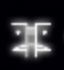

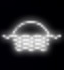

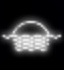

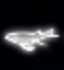

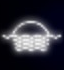

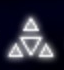

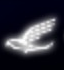

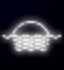

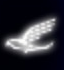

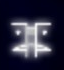

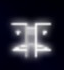

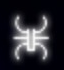

In [8]:
# Isolate each glyph
glyphs = isolate_glyphs(gray)
 

for x in range(12):
	glyphs[x].show() 

